In [1]:
from graphviz import Digraph

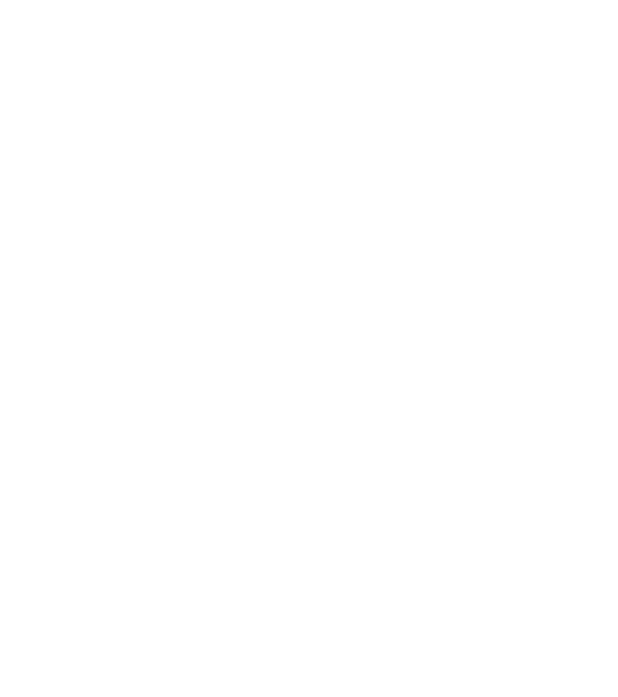

In [108]:
node_attr = dict(style='filled,rounded',
                     shape='box',
                     align='left',
                     fontsize='15',
                     ranksep='0.1',
                     height='0.1')
dot = Digraph(format="png", node_attr=node_attr, graph_attr=dict(size="12,12", dpi="400"))
# dot = Digraph(format="png", node_attr=node_attr, graph_attr=dict(size="12,6"))

DENSE_NAME = "Полносвязный\nслой"


def make_encoder(dot, i):
    i = str(i)
    dot.node("input_1"+i, "Входные\nпоследовательности", fillcolor='springgreen')
    
    dot.node("rnn"+i, "BiGRU\n(32 размер, 2 слоя)", fillcolor='dodgerblue')
    dot.edge("input_1"+i, "rnn"+i)
    
    dot.node("elu"+i, "ELU", fillcolor='lightskyblue')
    dot.edge("rnn"+i, "elu"+i)

    dot.node("dense_1"+i, DENSE_NAME+"\n(10 размер)", fillcolor='dodgerblue')
    dot.edge("elu"+i, "dense_1"+i)
    dot.node("dense_2"+i, DENSE_NAME+"\n(10 размер)", fillcolor='dodgerblue')
    dot.edge("elu"+i, "dense_2"+i)

    dot.node("mu"+i, "Средние значения", fillcolor='orange')
    dot.node("log_var"+i, "Логарифм дисперсии", fillcolor='orange')
    dot.edge("dense_1"+i, "mu"+i)
    dot.edge("dense_2"+i, "log_var"+i)

    dot.node("z"+i, "Многомерное\nпредставление", fillcolor='orange')
    dot.edge("mu"+i, "z"+i)
    dot.edge("log_var"+i, "z"+i)
    
    return dot

dot = make_encoder(dot, 1)
dot = make_encoder(dot, 2)

dot.node("dropout", "Дропаут\n(p = 0.3)", fillcolor='dodgerblue')
dot.edge("z1", "dropout")
dot.edge("z2", "dropout")

dot.node("dense_3", DENSE_NAME+"\n(размер 64)", fillcolor='dodgerblue')
dot.edge("dropout", "dense_3")

dot.node("elu", "ELU", fillcolor='lightskyblue')
dot.edge("dense_3", "elu")

dot.node("output", "Предсказания расстояния Левенштейна\nдля каждой пары входных последовательностей", fillcolor='springgreen')
dot.edge("elu", "output")

dot.render("chapter2_siamese_arch", cleanup=True)

dot

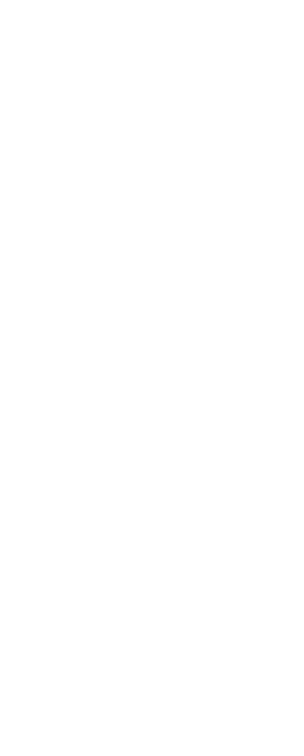

In [109]:
node_attr = dict(style='filled,rounded',
                     shape='box',
                     align='left',
                     fontsize='15',
                     ranksep='0.1',
                     height='0.1')
dot = Digraph(format="png", node_attr=node_attr, graph_attr=dict(size="12,12", dpi="400"))
# dot = Digraph(format="png", node_attr=node_attr, graph_attr=dict(size="12,12"))

def make_decoder(dot, i, inp_name):
    i = str(i)
    
    dot.node("rnn"+i, "BiGRU\n(32 размер, 2 слоя)", fillcolor='dodgerblue')
    dot.edge(inp_name, "rnn"+i)
    
    dot.node("elu"+i, "ELU", fillcolor='lightskyblue')
    dot.edge("rnn"+i, "elu"+i)

    dot.node("dense_1"+i, DENSE_NAME+"\n(32 размер)", fillcolor='dodgerblue')
    dot.edge("elu"+i, "dense_1"+i)
    
    return dot

dot = make_encoder(dot, 1)
dot = make_decoder(dot, 2, "z1")

dot.node("softmax", "Softmax", fillcolor='lightskyblue')
dot.edge("dense_12", "softmax")

dot.node("output", "Предсказанные символы для каждой \nвходной последовательности", fillcolor='springgreen')
dot.edge("softmax", "output")

dot.render("chapter2_vae_arch", cleanup=True)

dot